### Paper:
   #### Classification of Malicious Web Code Using Deep Learning [Manoj Kumar Selvam]
### Dataset:
   #### 1. XSS: https://portswigger.net/web-security/cross-site-scripting/cheat-sheet
   #### 2. 
   
   

In [15]:
import numpy as np
import pandas as pd
import glob
import time
import pandas as pd
# from xml.dom import minidom

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords 


import os
import matplotlib.pyplot as plt
import keras

[nltk_data] Downloading package punkt to /home/ebryx/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ebryx/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ebryx/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
import cv2

In [19]:
path='./data/portswigger.txt'

sqli_sentences=[]
f = open(path, "r")
for x in f:
    sqli_sentences.append(x)

In [20]:
len(sqli_sentences)

7121

In [6]:
# Manually removed tag data


path='./data/'
file="scottparker_ml_sqli_src__trainingdata_plain.txt"

In [7]:
df = pd.read_csv(os.path.join(path,file), sep='Aw3s0meSc0t7', names=['benign'], header=None, engine='python')

In [8]:
df.head()

,benign
0,Add plain text here
1,Ne te quaesiveris extra.
2,Man is his own star; and the soul that can
3,"Render an honest and a perfect man,"
4,"Commands all light, all influence, all fate;"


In [9]:
plain_text=df['benign'].values

In [10]:
plain_text[:5]

array(['Add plain text here', 'Ne te quaesiveris extra.',
       'Man is his own star; and the soul that can',
       'Render an honest and a perfect man,',
       'Commands all light, all influence, all fate;'], dtype=object)

In [11]:
plain_text=plain_text[:-22] # removed last 22 records that were urls

In [12]:
len(plain_text)

3641

In [13]:
data=''
for x in plain_text:
    data+=" " + x

In [16]:
stop_words = set(stopwords.words('english')) 
def fun_remove_stop_words(posts):
    filtered=''
    for x in posts.split(' '):
        if x not in stop_words:
            filtered+=' '+x
    return filtered

In [17]:
data=fun_remove_stop_words(data)
data=data.split('.')

In [18]:
data[:5]

['  Add plain text Ne te quaesiveris extra',
 ' Man star; soul Render honest perfect man, Commands light, influence, fate; Nothing falls early late',
 ' Our acts angels are, good ill, Our fatal shadows walk us still',
 ' Epilogue Beaumont Fletcher’s Honest Man’s Fortune Cast bantling rocks, Suckle she-wolf’s teat; Wintered hawk fox, Power speed hands feet',
 ' I read day verses written eminent painter original conventional']

In [22]:
values=[]
for i in sqli_sentences:
    values.append((i,1))

In [23]:


for i in data:
    values.append((i,0))



In [24]:
df=pd.DataFrame(values,columns=['Sentence','Label'])

In [156]:
df.to_csv('XSS_dataset.csv', encoding='utf-8-sig')

In [25]:
len(values)

10187

In [26]:
values[1]

('<a draggable="true" ondragend="alert(1)">test</a>\n', 1)

In [27]:
values[-1]

('com" style="max-width:450px;float:left;padding:10px 10px 10px 0px;border:0px;">As type buying selling turn 2145 215 22 220 540 543 544473 buy omnicef diners club store 544473">buy omnicef diners club store 544473"]buy omnicef diners club store 9ArATgxuN99s5bw1e@V$K@JrLjlTnn1aFZqEw2cH@V$K@1d2RRER7vmuzdd4nPCz@V$K@/CkclyEqatPpZvNr == ==01 @7520 A3B10 A3B12C41 A3B12C411 APP AR-203 ASCd AgAHMzM3MsdfjMwMExG6Pvz1i3DhGd7DSt5Ve9Qu/n91BdfdEB5EbdeO/M5lphLOo5yOn/ZyS1jabRmzu2WUHoScLEwJjaDz2yHm9tJWbLuELC/JM8Eix/VtyWmMO5osa8FbYZnPanAxI7Ty0n7avQytu2rEK2F+N+C390zLVThtSXL1Isk49OSEWuEAzdaRlmLUWcpx6XSDjFZ++1cgwEoAILJ9Q5NObm6nYipbGovJ6YZgiEncnT9GU6x6sgKNppX0YgXXmss+0Qi5eXWmDn30UlwjfTbmc+Ta17XLDXGm6f/hiM7f4fde+5c+Pavn9EIZXYe9K6G/GyCM7I0dzjPIsjEOwl96y+fYXoZoJcp79kLwtTy6F1dL1HAs8DSFoIrfoUs7zyFtzgMnV2K0sT68IwWkiof2eM1Xes5nbDzmHOEQZ+loGLF2UBIyGcz4cSCtdZhrJXt7TxSIzeHKYpCgtVhNo4zJDlHo7zpUnR+8dSlUsdf18e08zs4iGMRK43bhv6oGA6dUw/dX+exrGTL+NMOThQUQvFdYNsc+AFGWo3PqLFhjQ9s3RzK5krr6II3e2vKhs36q7NgNgaIlQNiqNo8cNbE8iVUxZ

In [ ]:
sentences=df['Sentence'].values
sentences[1]

In [65]:
def display_ascii(sentence):
    sentence_ascii=[]

    for i in sentence:
        sentence_ascii.append(ord(i))

    zer=np.zeros((10000))

    for i in range(len(sentence_ascii)):
        zer[i]=sentence_ascii[i]

    zer.shape=(100, 100)


#     plt.plot(image)
#     plt.show()
    return zer


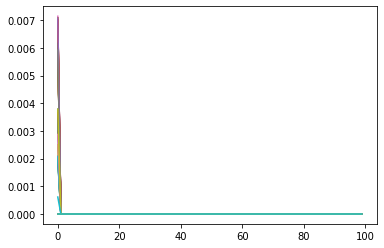

In [69]:
# display_ascii(sentences[100])


arr=np.zeros((10187,100,100))

for i in range(len(sentences)):
    
    image=display_ascii(sentences[i])

    x=np.asarray(image,dtype='float')
    image =  cv2.resize(x, dsize=(100,100), interpolation=cv2.INTER_CUBIC)
    image/=128
    
    if i==1:
        plt.plot(image)
        plt.show()    
    arr[i]=image

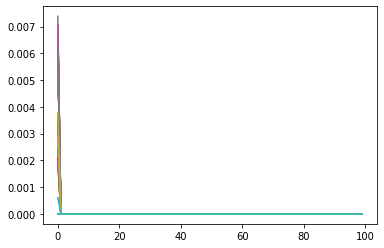

In [71]:
plt.plot(arr[405])
plt.show() 

In [73]:
arr.shape

(10187, 100, 100)

In [86]:
data = arr.reshape(arr.shape[0], 100, 100, 1)

In [105]:
y=df['Label'].values

In [106]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(data,y, test_size=0.2, random_state=42)

In [107]:


from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D,Flatten,Dropout,MaxPool2D, BatchNormalization



In [118]:
model = Sequential()
model.add(Conv2D(input_shape=(100,100,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=1024,activation="relu"))
model.add(Dense(units=1024,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [119]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 100, 100, 64)      640       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 100, 100, 64)      36928     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 25, 25, 256)       147712    
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 12, 12, 512)      

In [120]:
import keras
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [121]:
batch_size = 128
num_epoch = 10
#model training
model_log = model.fit(trainX, trainY,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=( testX,  testY))

Train on 8149 samples, validate on 2038 samples
Epoch 1/10
8149/8149 [==============================] - 234s 29ms/step - loss: 0.6183 - accuracy: 0.6909 - val_loss: 0.6143 - val_accuracy: 0.6982
Epoch 2/10
8149/8149 [==============================] - 227s 28ms/step - loss: 0.6142 - accuracy: 0.7002 - val_loss: 0.6103 - val_accuracy: 0.7002
Epoch 3/10
8149/8149 [==============================] - 223s 27ms/step - loss: 0.6091 - accuracy: 0.7023 - val_loss: 0.6100 - val_accuracy: 0.7002
Epoch 4/10
8149/8149 [==============================] - 224s 27ms/step - loss: 0.6085 - accuracy: 0.7023 - val_loss: 0.6102 - val_accuracy: 0.7002
Epoch 5/10
8149/8149 [==============================] - 226s 28ms/step - loss: 0.6085 - accuracy: 0.7023 - val_loss: 0.6102 - val_accuracy: 0.7002
Epoch 6/10
8149/8149 [==============================] - 225s 28ms/step - loss: 0.6085 - accuracy: 0.7023 - val_loss: 0.6100 - val_accuracy: 0.7002
Epoch 7/10
8149/8149 [==============================] - 226s 28ms/step

KeyboardInterrupt: 

In [122]:
model = Sequential()
model.add(Conv2D(input_shape=(100,100,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=1024,activation="relu"))
model.add(Dense(units=1024,activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))

In [123]:
import keras
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [124]:
batch_size = 128
num_epoch = 10
#model training
model_log = model.fit(trainX, trainY,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=( testX,  testY))

Train on 8149 samples, validate on 2038 samples
Epoch 1/10
8149/8149 [==============================] - 235s 29ms/step - loss: 0.6225 - accuracy: 0.6951 - val_loss: 0.6161 - val_accuracy: 0.6982
Epoch 2/10
8149/8149 [==============================] - 240s 29ms/step - loss: 0.6140 - accuracy: 0.7013 - val_loss: 0.6101 - val_accuracy: 0.7002
Epoch 3/10
8149/8149 [==============================] - 235s 29ms/step - loss: 0.6101 - accuracy: 0.7023 - val_loss: 0.6122 - val_accuracy: 0.7002
Epoch 4/10
3456/8149 [===========>..................] - ETA: 2:02 - loss: 0.6074 - accuracy: 0.7040

KeyboardInterrupt: 

In [130]:
input_dim

100

In [144]:
input_dim = trainX.shape[1]  # Number of features

model = Sequential()
model.add(keras.layers.Flatten(input_shape=(100,100,1)))
model.add(keras.layers.Dense(20,  activation='relu'))
model.add(keras.layers.Dense(10,  activation='tanh'))
# model.add(layers.Flatten())
model.add(keras.layers.Dense(1024, activation='relu'))

model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [145]:


model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()



Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 10000)             0         
_________________________________________________________________
dense_41 (Dense)             (None, 20)                200020    
_________________________________________________________________
dense_42 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_43 (Dense)             (None, 1024)              11264     
_________________________________________________________________
batch_normalization_5 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_44 (Dense)             (None, 1)               

In [146]:
batch_size = 64
num_epoch = 10
#model training
model_log = model.fit(trainX, trainY,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=( testX,  testY))

Train on 8149 samples, validate on 2038 samples
Epoch 1/10
8149/8149 [==============================] - 2s 291us/step - loss: 0.4624 - accuracy: 0.8024 - val_loss: 0.5649 - val_accuracy: 0.6992
Epoch 2/10
8149/8149 [==============================] - 2s 190us/step - loss: 0.1967 - accuracy: 0.9382 - val_loss: 0.5893 - val_accuracy: 0.7056
Epoch 3/10
8149/8149 [==============================] - 2s 190us/step - loss: 0.0717 - accuracy: 0.9854 - val_loss: 0.5663 - val_accuracy: 0.5545
Epoch 4/10
8149/8149 [==============================] - 1s 181us/step - loss: 0.0437 - accuracy: 0.9934 - val_loss: 1.2818 - val_accuracy: 0.7134
Epoch 5/10
8149/8149 [==============================] - 2s 193us/step - loss: 0.0381 - accuracy: 0.9950 - val_loss: 0.2360 - val_accuracy: 0.9313
Epoch 6/10
8149/8149 [==============================] - 2s 227us/step - loss: 0.0400 - accuracy: 0.9933 - val_loss: 0.1096 - val_accuracy: 0.9715
Epoch 7/10
8149/8149 [==============================] - 2s 188us/step - loss

In [148]:
pred=model.predict(testX)

In [149]:
for i in range(len(pred)):
    if pred[i]>0.5:
        pred[i]=1
    elif pred[i]<=0.5:
        pred[i]=0

In [150]:
true=0
false=0

for i in range(len(pred)):
    if pred[i] == testY[i]:
        true+=1
    else:
        false+=1

In [151]:
true

2029

In [152]:
false

9